In [1]:
## MP 573 Lecture 16: Limitations of Fourier analysis. Introduction to the STFT. 
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal

font = {'weight' : 'normal',
        'size'   : 18}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

Text(0, 0.5, 'Signal')

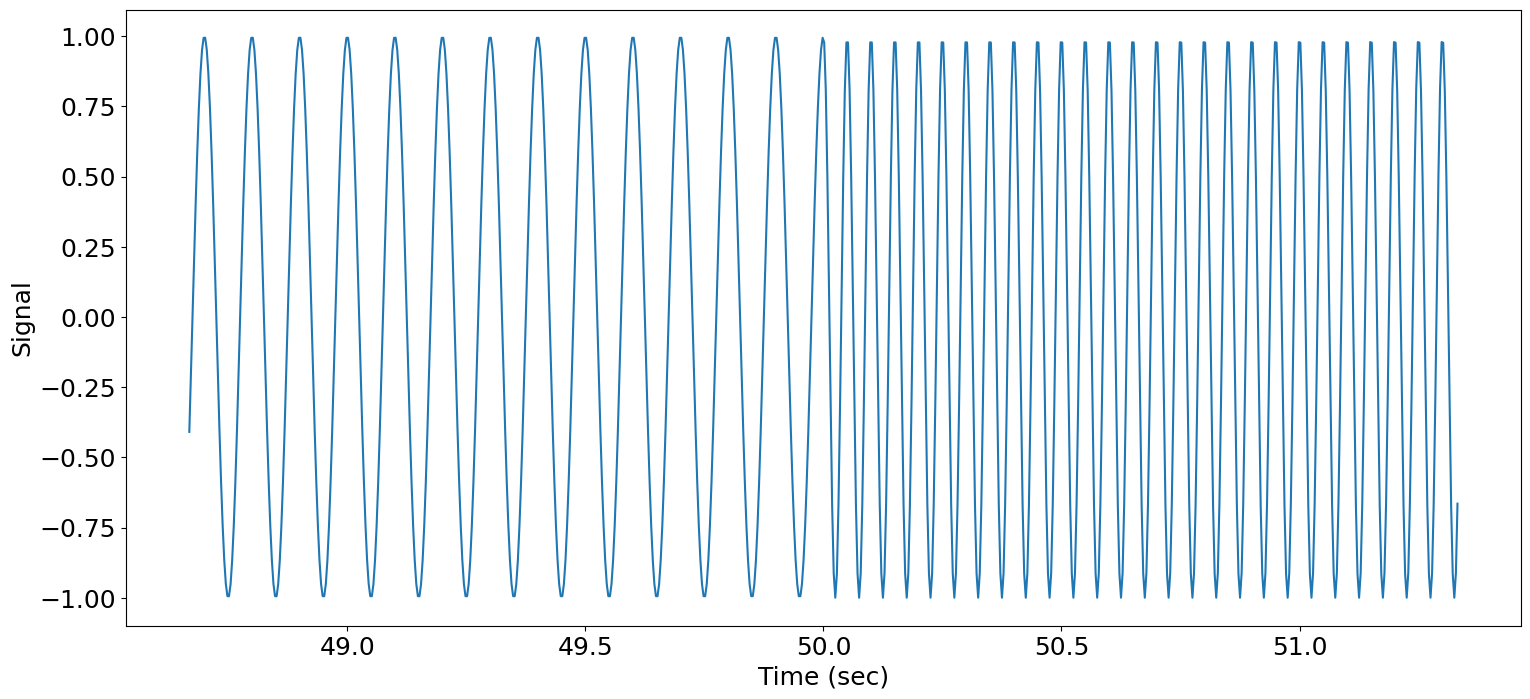

In [8]:
# Simulate 1D complex sinusoidal signal, and plot its real/imaginary values, and also magnitude/phase
N = 30000
tmax = 100
t = np.linspace(0,tmax,N)
u0 = 10 # Frequency, in cycles per unit length (or cycles/s = Hz)
s = 0*t; # Initialize our signal as all zeroes

# Let's consider two types of non-stationary signal (smooth change vs abrupt change)
CHANGE_ABRUPT = 1

if CHANGE_ABRUPT < 1:
    s = np.cos(2*np.pi*u0*t**1.4) + np.sin(2*np.pi*u0*t**1.2) # Note t^1.4 and t^1.2 signal behavior
else:
    s[0:15000] = np.cos(2*np.pi*u0*t[0:15000])
    s[15000:N] = np.cos(2*np.pi*2*u0*t[15000:N])

plt.figure(figsize=(18,8))
plt.plot(t[14600:15400],s[14600:15400])
plt.xlabel('Time (sec)')
plt.ylabel('Signal')

Text(0, 0.5, 'DFT Signal')

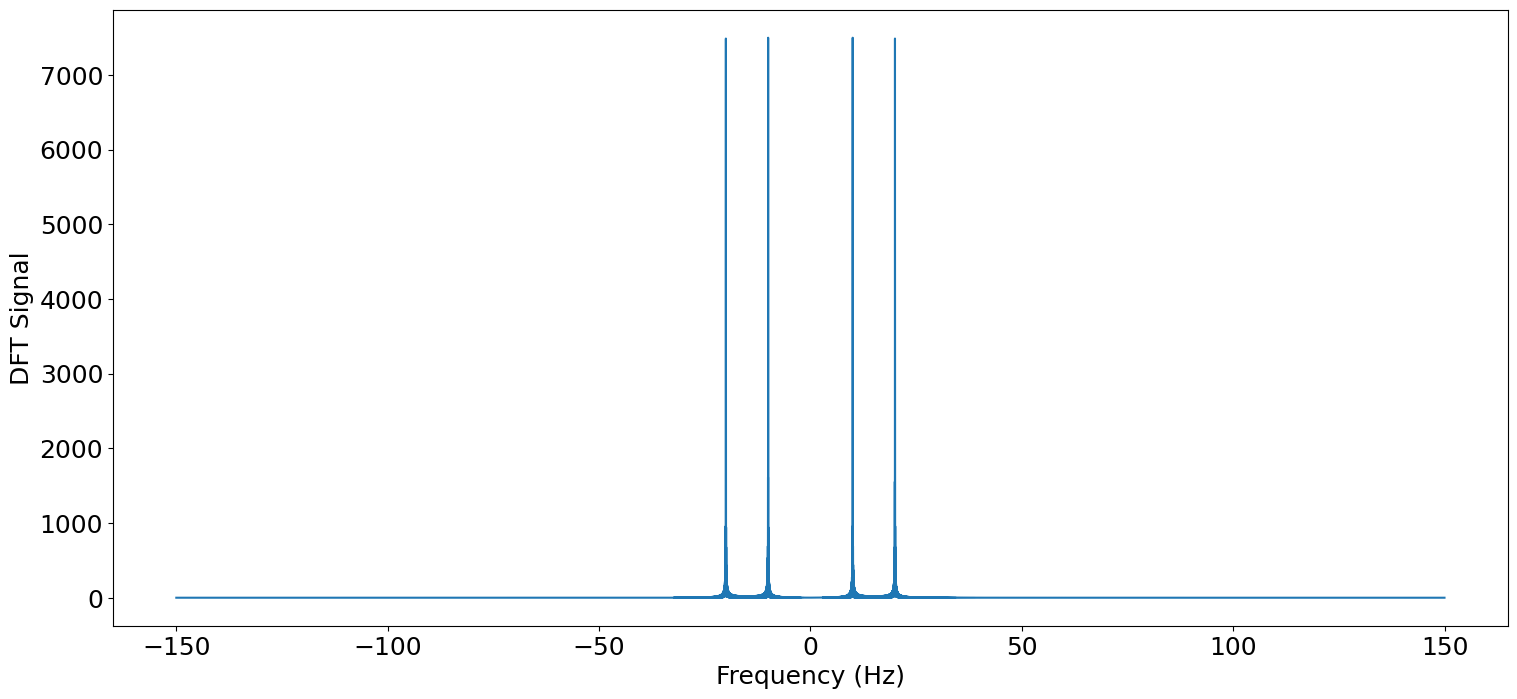

In [9]:
# Let's calculate an FFT
shat = np.fft.fftshift(np.fft.fft(s))
freq_range = 1/(t[1]-t[0])
freqs = np.linspace(-freq_range/2,freq_range/2,N)
plt.figure(figsize=(18,8))
plt.plot(freqs,abs(shat))
plt.xlabel('Frequency (Hz)')
plt.ylabel('DFT Signal')

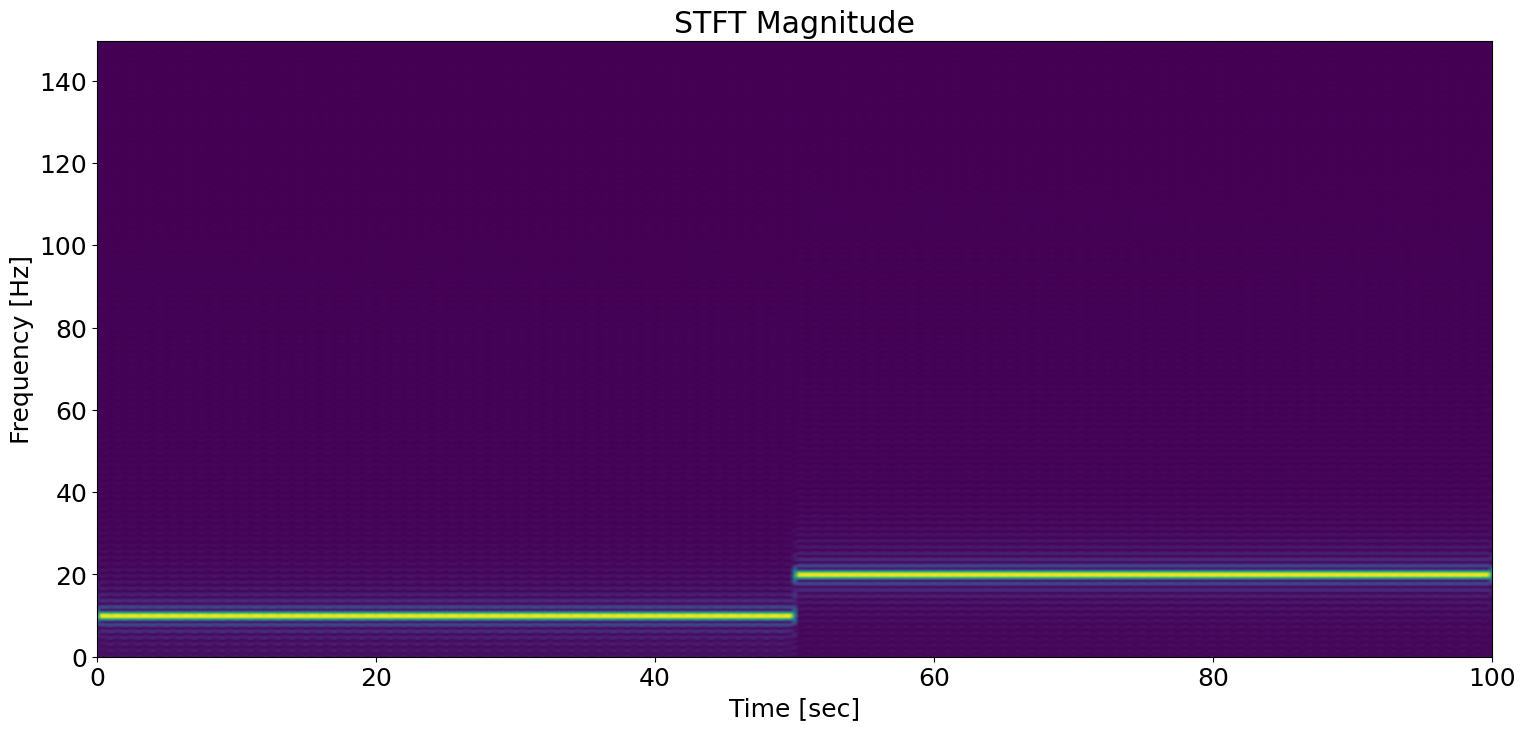

In [10]:
# Now let's do an STFT
segment_length = 200
fft_length = 5*segment_length
window_type = 'boxcar'
max_f = 150

f, t, Zxx = signal.stft(s, fs=N/tmax,nperseg=segment_length, nfft=fft_length, window=window_type)
plt.figure(figsize=(18,8))
plt.rc('font', **font)
plt.pcolormesh(t, f[f<max_f], np.abs(Zxx[f<max_f,:]),shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
